In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')
train.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
3022,3275_01,Earth,False,F/617/S,55 Cancri e,35.0,False,256.0,0.0,341.0,35.0,0.0,Darley Gibbsonton,True
6416,6778_01,Earth,False,F/1299/S,TRAPPIST-1e,47.0,False,0.0,758.0,0.0,0.0,1417.0,Brada Fielson,False
4510,4793_02,Europa,False,E/310/S,TRAPPIST-1e,20.0,False,0.0,1131.0,3783.0,161.0,0.0,Chargin Brailidy,True
7151,7628_02,Mars,False,D/240/P,TRAPPIST-1e,36.0,False,1103.0,3.0,0.0,0.0,659.0,Ban Stre,False
1026,1091_01,Mars,True,F/223/P,TRAPPIST-1e,35.0,False,0.0,0.0,0.0,0.0,0.0,Dills Miste,True


In [76]:
test.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
4188,9086_01,Earth,True,G/1462/S,TRAPPIST-1e,22.0,False,0.0,0.0,0.0,0.0,NaN,Therry Craftstens
3198,6989_01,Earth,True,G/1140/S,TRAPPIST-1e,59.0,False,0.0,0.0,0.0,0.0,0.0,Blancy Fisheparks
4161,9027_01,Earth,False,F/1750/S,TRAPPIST-1e,43.0,False,1.0,0.0,0.0,0.0,1995.0,Geneen Mcleandez
1086,2304_01,Earth,True,G/370/P,TRAPPIST-1e,21.0,False,0.0,0.0,0.0,0.0,0.0,Glenry Herreras
683,1392_01,Europa,False,B/46/P,TRAPPIST-1e,42.0,False,0.0,2799.0,23.0,151.0,1260.0,Menchah Horbox


In [77]:
train[["groupId", "groupPassengerId"]] = train["PassengerId"].str.split("_", expand=True).astype(int)
train[["deck", "num", "side"]] = train["Cabin"].str.split("/", expand=True)
train[["totalSpending"]] = train[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1)
test[["groupId", "groupPassengerId"]] = test["PassengerId"].str.split("_", expand=True).astype(int)
test[["deck", "num", "side"]] = test["Cabin"].str.split("/", expand=True)
test[["totalSpending"]] = test[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].sum(axis=1)

In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       8693 non-null   object 
 1   HomePlanet        8492 non-null   object 
 2   CryoSleep         8476 non-null   object 
 3   Cabin             8494 non-null   object 
 4   Destination       8511 non-null   object 
 5   Age               8514 non-null   float64
 6   VIP               8490 non-null   object 
 7   RoomService       8512 non-null   float64
 8   FoodCourt         8510 non-null   float64
 9   ShoppingMall      8485 non-null   float64
 10  Spa               8510 non-null   float64
 11  VRDeck            8505 non-null   float64
 12  Name              8493 non-null   object 
 13  Transported       8693 non-null   bool   
 14  groupId           8693 non-null   int32  
 15  groupPassengerId  8693 non-null   int32  
 16  deck              8494 non-null   object 


In [79]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       4277 non-null   object 
 1   HomePlanet        4190 non-null   object 
 2   CryoSleep         4184 non-null   object 
 3   Cabin             4177 non-null   object 
 4   Destination       4185 non-null   object 
 5   Age               4186 non-null   float64
 6   VIP               4184 non-null   object 
 7   RoomService       4195 non-null   float64
 8   FoodCourt         4171 non-null   float64
 9   ShoppingMall      4179 non-null   float64
 10  Spa               4176 non-null   float64
 11  VRDeck            4197 non-null   float64
 12  Name              4183 non-null   object 
 13  groupId           4277 non-null   int32  
 14  groupPassengerId  4277 non-null   int32  
 15  deck              4177 non-null   object 
 16  num               4177 non-null   object 


In [80]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,groupId,groupPassengerId,totalSpending
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,4633.389624,1.517773,1440.866329
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,2671.028856,1.054241,2803.045694
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2319.000000,1.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4630.000000,1.000000,716.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,6883.000000,2.000000,1441.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,9280.000000,8.000000,35987.000000


In [81]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,groupId,groupPassengerId,totalSpending
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000,4277.000000,4277.000000,4277.00000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031,4639.296469,1.498714,1417.68202
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742,2716.197368,1.018221,2816.40210
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.00000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2249.000000,1.000000,0.00000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4639.000000,1.000000,714.00000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000,7030.000000,2.000000,1444.00000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000,9277.000000,8.000000,33666.00000


In [82]:
train.isnull().sum()

PassengerId           0
HomePlanet          201
CryoSleep           217
Cabin               199
Destination         182
Age                 179
VIP                 203
RoomService         181
FoodCourt           183
ShoppingMall        208
Spa                 183
VRDeck              188
Name                200
Transported           0
groupId               0
groupPassengerId      0
deck                199
num                 199
side                199
totalSpending         0
dtype: int64

In [83]:
test.isnull().sum()

PassengerId           0
HomePlanet           87
CryoSleep            93
Cabin               100
Destination          92
Age                  91
VIP                  93
RoomService          82
FoodCourt           106
ShoppingMall         98
Spa                 101
VRDeck               80
Name                 94
groupId               0
groupPassengerId      0
deck                100
num                 100
side                100
totalSpending         0
dtype: int64

In [84]:
train.isnull().sum() / train.shape[0]

PassengerId         0.000000
HomePlanet          0.023122
CryoSleep           0.024963
Cabin               0.022892
Destination         0.020936
Age                 0.020591
VIP                 0.023352
RoomService         0.020821
FoodCourt           0.021051
ShoppingMall        0.023927
Spa                 0.021051
VRDeck              0.021627
Name                0.023007
Transported         0.000000
groupId             0.000000
groupPassengerId    0.000000
deck                0.022892
num                 0.022892
side                0.022892
totalSpending       0.000000
dtype: float64

In [85]:
test.isnull().sum() / test.shape[0]

PassengerId         0.000000
HomePlanet          0.020341
CryoSleep           0.021744
Cabin               0.023381
Destination         0.021510
Age                 0.021277
VIP                 0.021744
RoomService         0.019172
FoodCourt           0.024784
ShoppingMall        0.022913
Spa                 0.023615
VRDeck              0.018705
Name                0.021978
groupId             0.000000
groupPassengerId    0.000000
deck                0.023381
num                 0.023381
side                0.023381
totalSpending       0.000000
dtype: float64

<AxesSubplot:>

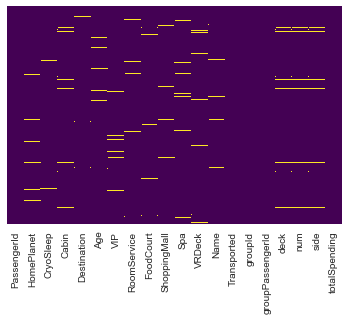

In [86]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [87]:
sns.set_style('whitegrid')

<Figure size 864x576 with 0 Axes>

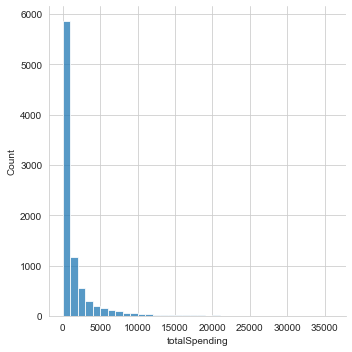

In [90]:
plt.figure(figsize=(12, 8))
sns.displot(train,x=train['totalSpending'],binwidth=1000,bins=35)

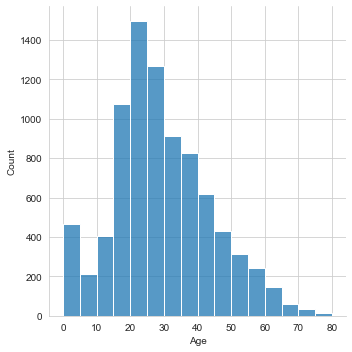

In [96]:
sns.displot(train,x=train['Age'],binwidth=5,bins=20)

In [97]:
num_cols=train._get_numeric_data().columns
cat_cols=list(set(train.columns)-set(num_cols))
print(num_cols,cat_cols)

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'groupId', 'groupPassengerId', 'totalSpending'],
      dtype='object') ['CryoSleep', 'VIP', 'Cabin', 'HomePlanet', 'num', 'deck', 'side', 'PassengerId', 'Name', 'Destination']
